<a href="https://colab.research.google.com/github/sophiasy88/MATH3364_25Spring/blob/main/HW1Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# --- HW 1 Solutions ---

# --- Question 3: Training vs. Test RSS in Polynomial Regression ---
print("\n--- Question 3: Training vs. Test RSS ---")
print("(a) Training RSS for cubic regression will always be less than or equal to linear regression.")
print("(b) Test RSS depends on the true relationship; cubic may overfit if the true function is linear.")
print("(c) If the true relationship is non-linear, cubic regression should have a lower training RSS.")
print("(d) The test RSS for cubic regression depends on whether it captures true patterns or overfits.")


--- Question 3: Training vs. Test RSS ---
(a) Training RSS for cubic regression will always be less than or equal to linear regression.
(b) Test RSS depends on the true relationship; cubic may overfit if the true function is linear.
(c) If the true relationship is non-linear, cubic regression should have a lower training RSS.
(d) The test RSS for cubic regression depends on whether it captures true patterns or overfits.


In [3]:
# --- Question 4: Polynomial Regression RSS Comparison ---
print("\n--- Question 4: Comparing Training & Test RSS ---")
print("(a) A more flexible model (cubic regression) will always reduce training RSS.")
print("(b) If the cubic model overfits, test RSS may be higher than the linear model.")
print("(c) If the true function is non-linear, cubic regression should improve training RSS.")
print("(d) Test RSS can be higher or lower depending on whether flexibility helps or causes overfitting.")



--- Question 4: Comparing Training & Test RSS ---
(a) A more flexible model (cubic regression) will always reduce training RSS.
(b) If the cubic model overfits, test RSS may be higher than the linear model.
(c) If the true function is non-linear, cubic regression should improve training RSS.
(d) Test RSS can be higher or lower depending on whether flexibility helps or causes overfitting.


In [4]:
# --- Question 5: Linear Regression Without an Intercept ---
print("\n--- Question 5: Linear Regression Without Intercept ---")
print("Regression without an intercept follows:")
print("ŷᵢ = βXᵢ, where β = (Σ Xᵢ Yᵢ) / (Σ Xᵢ²).")
print("Thus, each fitted value is a linear combination of response values.")


--- Question 5: Linear Regression Without Intercept ---
Regression without an intercept follows:
ŷᵢ = βXᵢ, where β = (Σ Xᵢ Yᵢ) / (Σ Xᵢ²).
Thus, each fitted value is a linear combination of response values.


In [5]:
# --- Question 8: Linear Regression on Auto Dataset ---
print("\n--- Question 8: Linear Regression on Auto Dataset ---")

from google.colab import files
uploaded = files.upload()



--- Question 8: Linear Regression on Auto Dataset ---


Saving Auto.csv to Auto.csv


In [7]:
Autodata = pd.read_csv('Auto.csv').dropna()

In [9]:
# Convert horsepower to numeric
Autodata["horsepower"] = pd.to_numeric(Autodata["horsepower"], errors='coerce')
#Now drop rows with NaN in horsepower column:
Autodata = Autodata.dropna()
# Define predictor and response
X = Autodata["horsepower"]
y = Autodata["mpg"]

In [10]:
# Add constant for intercept
X = sm.add_constant(X)
# Fit the model
model = sm.OLS(y, X).fit()

In [11]:
# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           7.03e-81
Time:                        18:16:24   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [12]:
# --- Part (a) Compute Predicted MPG for Horsepower = 98 ---
hp_98 = np.array([1, 98])  # 1 for intercept
predicted_mpg = model.predict(hp_98)[0]
print(f"Predicted MPG for horsepower = 98: {predicted_mpg:.4f}")

Predicted MPG for horsepower = 98: 24.4671


<ipython-input-14-a1a3753bf0e2>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mpg_pred = model.params[0] + model.params[1] * hp_range


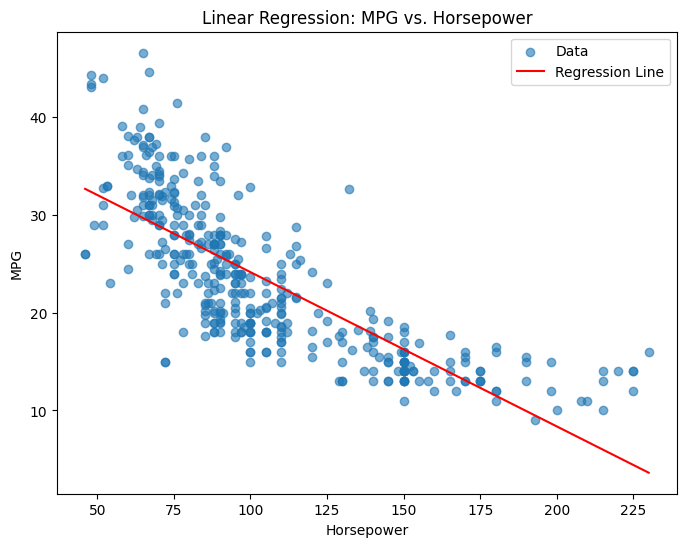

In [14]:
# --- Part (b) Plot Regression Line ---
plt.figure(figsize=(8, 6))
plt.scatter(Autodata["horsepower"], Autodata["mpg"], label="Data", alpha=0.6)
hp_range = np.linspace(Autodata["horsepower"].min(), Autodata["horsepower"].max(), 100)
mpg_pred = model.params[0] + model.params[1] * hp_range
plt.plot(hp_range, mpg_pred, color="red", label="Regression Line")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression: MPG vs. Horsepower")
plt.legend()
plt.show()

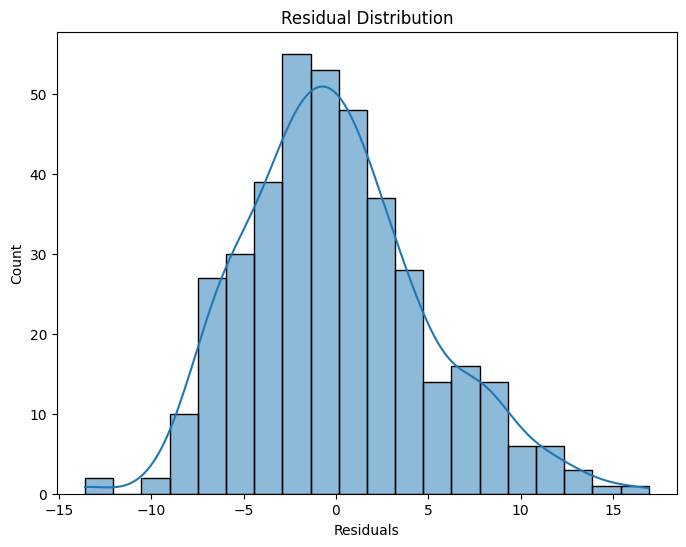

In [15]:
# --- Part (c) Residual Analysis ---
residuals = model.resid
# Residual histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

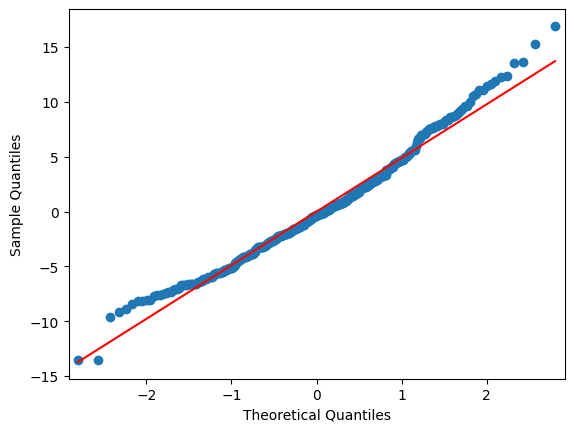

In [16]:
# QQ plot for normality
sm.qqplot(residuals, line="s")
plt.show()